/srv/home/xihua/Key_Product_Metrics
Generating Content Interactions chart...


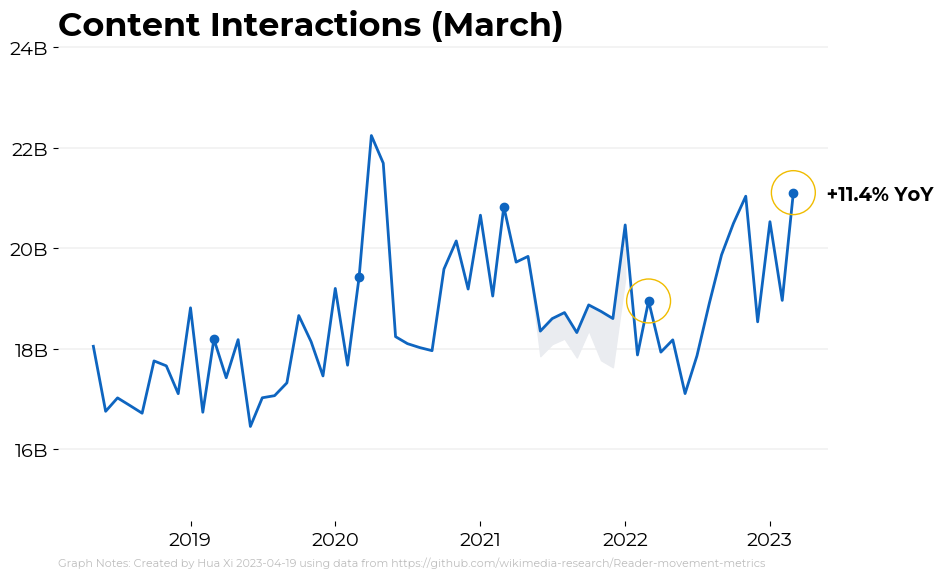

In [1]:
import datetime
from datetime import timedelta
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import os
import pandas as pd
%cd ..
%run wikicharts.ipynb

def main():
    print("Generating Content Interactions chart...")

    #---SET PARAMETERS---
    #get current path
    home_dir = os.getcwd()
    outfile_name = "Content_Interactions.png"
    yoy_note = " "
    display_flag = False
    save_file_name = home_dir + "/charts/" + outfile_name

    #---CLEAN DATA--
    #read in data
    df = pd.read_csv(home_dir + '/resources/data/reader_metrics.tsv', sep='\t')
    corrected_df = pd.read_csv(home_dir + '/resources/data/corrected_metrics_only.csv', sep=',')

    start_date = "2018-05-01"
    end_date = datetime.datetime.today()

    #convert string to datetime
    df['month'] = pd.to_datetime(df['month'])
    corrected_df['month'] = pd.to_datetime(corrected_df['month'])

    #set new index
    corrected_df.set_index('month')

    #truncate to preferred date range
    df = df[df["month"].isin(pd.date_range(start_date, end_date))]

    #combine datasets — add corrected values to the reader metrics dataset
    df['interactions_corrected'] = df['interactions']
    correction_range = pd.date_range(start='2021-05-01', end='2022-01-01', freq='MS')
    for m in correction_range:
        row_index = df[df['month'] == m].index 
        correct_row = corrected_df.loc[corrected_df['month'] ==  m]
        df.loc[row_index, 'interactions_corrected'] = correct_row['interactions_corrected'].values

    #---MAKE CHART---
    chart = Wikichart(start_date,end_date,df)
    chart.init_plot()
    chart.plot_data_loss('month','interactions','interactions_corrected',corrected_df)
    chart.plot_line('month','interactions_corrected',wmf_colors['blue'])
    chart.plot_monthlyscatter('month','interactions_corrected',wmf_colors['blue'])
    chart.plot_yoy_highlight('month','interactions_corrected')
    chart.format(title = f'Content Interactions',
        radjust=0.87,
        data_source="https://github.com/wikimedia-research/Reader-movement-metrics")
    chart.annotate(x='month',
        y='interactions_corrected',
        num_annotation=chart.calc_yoy(y='interactions_corrected'))
    chart.finalize_plot(save_file_name,display=display_flag)

if __name__ == "__main__":
    main()